# Recurrent Neural Network To Predict Stock Price



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler

In [3]:
dataset = pd.read_csv('petr4_training_ex.csv')
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0
...,...,...,...,...,...,...,...
1340,2018-05-21,26.100000,26.290001,24.940001,25.049999,25.000000,75971900.0
1341,2018-05-22,24.809999,25.290001,24.150000,24.709999,24.709999,88109900.0
1342,2018-05-23,24.230000,24.480000,23.270000,23.270000,23.270000,74622500.0
1343,2018-05-24,20.049999,20.750000,19.650000,20.080000,20.080000,240343800.0


In [ ]:
dataset.isnull().sum()

Date         0
Open         3
High         3
Low          3
Close        3
Adj Close    3
Volume       3
dtype: int64

In [5]:
dataset = dataset.dropna()
dataset.shape

(1342, 7)

In [9]:
dataset_train = dataset.iloc[:, 1:2].values
dataset_train

array([[19.99    ],
       [19.809999],
       [20.33    ],
       ...,
       [24.23    ],
       [20.049999],
       [20.65    ]])

In [11]:
normalizer = MinMaxScaler(feature_range= (0, 1))
dataset_train = normalizer.fit_transform(dataset_train)

In [13]:
x, y = [], []

# using the last 90 prices to predict the next
for i in range(90, 1342):
    x.append(dataset_train[i-90:i, 0])
    y.append(dataset_train[i, 0])

x, y = np.array(x), np.array(y)

In [14]:
x.shape, y.shape

((1252, 90), (1252,))

In [15]:
model = Sequential()

model.add(LSTM(units= 100, return_sequences= True, input_shape= (x.shape[1], 1)))
model.add(Dropout(rate= 0.3))

model.add(LSTM(units= 50, return_sequences= True))
model.add(Dropout(rate= 0.3))

model.add(LSTM(units= 50, return_sequences= True))
model.add(Dropout(rate= 0.3))

model.add(LSTM(units= 50))
model.add(Dropout(rate= 0.3))

model.add(Dense(units= 1, activation= 'linear'))

c:\Users\Pedro\Documents\codigos\Deep-Learning\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.compile(optimizer= tf.keras.optimizers.RMSprop(), loss= 'mean_squared_error', metrics= ['mean_absolute_error',])

In [18]:
model.fit(
    x,
    y,
    epochs= 100,
    batch_size= 32
)

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 0.0534 - mean_absolute_error: 0.1705
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.0154 - mean_absolute_error: 0.0976
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0088 - mean_absolute_error: 0.0717
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0132 - mean_absolute_error: 0.0850
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.0115 - mean_absolute_error: 0.0822
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.0097 - mean_absolute_error: 0.0754
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0080 - mean_absolute_error: 0.0681
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.0073 - mean_absolute_error: 0.0650
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.0068 - mean_absolute_error: 0.0616
Epoch 10/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.0061 - mean_absolute_error: 0.0608
Epoch 11/100
40/40 ━━━━━━━━━━

In [19]:
dataset_test = pd.read_csv('petr4_test_ex.csv')
dataset_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-05-28,19.200001,19.200001,16.910000,16.910000,16.910000,134504900
1,2018-05-29,18.000000,19.440001,17.600000,19.299999,19.299999,181509800
2,2018-05-30,18.389999,19.969999,18.129999,18.980000,18.980000,125430000
3,2018-06-01,19.559999,19.750000,14.900000,16.160000,16.160000,216954700
4,2018-06-04,17.290001,17.639999,17.049999,17.530001,17.530001,93547600
5,2018-06-05,17.360001,17.799999,16.590000,16.590000,16.590000,67006400
6,2018-06-06,16.469999,16.680000,15.870000,16.330000,16.330000,69496800
7,2018-06-07,16.000000,16.160000,14.930000,15.760000,15.760000,118752700
8,2018-06-08,15.810000,16.190001,15.060000,15.250000,15.250000,91461500
9,2018-06-11,15.500000,15.800000,15.130000,15.410000,15.410000,44872500


In [21]:
y_test = dataset_test.iloc[:, 1:2].values
y_test

array([[19.200001],
       [18.      ],
       [18.389999],
       [19.559999],
       [17.290001],
       [17.360001],
       [16.469999],
       [16.      ],
       [15.81    ],
       [15.5     ],
       [15.48    ],
       [15.42    ],
       [15.33    ],
       [15.03    ],
       [14.77    ],
       [14.26    ],
       [15.84    ],
       [16.09    ],
       [15.41    ]])

In [24]:
dataset_completed = pd.concat((dataset['Open'], dataset_test['Open']), axis= 0)
dataset_completed.shape

(1361,)

In [25]:
inputs = dataset_completed[len(dataset_completed) - len(dataset_test) - 90:].values
inputs = inputs.reshape(-1, 1)
inputs.shape

(109, 1)

In [27]:
inputs = normalizer.transform(inputs)
inputs

array([[0.56803456],
       [0.59265659],
       [0.6112311 ],
       [0.6095032 ],
       [0.60734341],
       [0.61339093],
       [0.61425486],
       [0.65399568],
       [0.66609076],
       [0.66825054],
       [0.67257019],
       [0.6712743 ],
       [0.67213823],
       [0.69546432],
       [0.66738661],
       [0.62462203],
       [0.68120946],
       [0.66306691],
       [0.64060479],
       [0.63974082],
       [0.66090713],
       [0.65917922],
       [0.66306691],
       [0.67732177],
       [0.70799136],
       [0.70799136],
       [0.72354216],
       [0.74298056],
       [0.74600428],
       [0.75291572],
       [0.74298056],
       [0.71274302],
       [0.74686825],
       [0.79049676],
       [0.7555076 ],
       [0.76241901],
       [0.75939529],
       [0.79222467],
       [0.78833698],
       [0.78185741],
       [0.77105827],
       [0.74600428],
       [0.73736501],
       [0.73347732],
       [0.73650108],
       [0.76285102],
       [0.75205188],
       [0.771

In [29]:
x_test = []
for i in range(90, 109):
    x_test.append(inputs[i-90:i, 0])

x_test = np.array(x_test)
x_test.shape

(19, 90)

In [30]:
predictions = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


In [31]:
predictions = normalizer.inverse_transform(predictions)

In [32]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, predictions)

1.4335106509784898

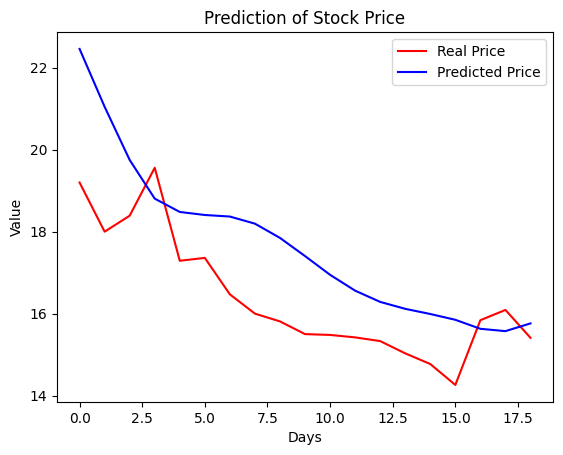

In [33]:
plt.plot(y_test, color= "red", label= "Real Price")
plt.plot(predictions, color= "blue", label= "Predicted Price")
plt.title("Prediction of Stock Price")
plt.xlabel("Days")
plt.ylabel("Value")
plt.legend()